In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# /content/drive/MyDrive/AiHackathon/AiImage

Mounted at /content/drive


#import libraries

In [ ]:

import os
import cv2
import numpy as np
from keras import backend as k
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
import scipy
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D,BatchNormalization,AveragePooling2D
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime

#Creating the dataset, resizing, applying greyscale filter


In [ ]:
dataDir_Tr = "/content/drive/MyDrive/AiHackathon/AiImage"
dataDir_Ts = "/content/drive/MyDrive/AiHackathon/testData"
CATEGORIES = ["clay cups","clay doll","clay flower pot","kalah","saaki"]
IMG_SIZE = 50

In [ ]:

training_data = []
testing_data = []

def create_training_data(dataDir,X):
    for category in CATEGORIES:
        path = os.path.join(dataDir, category)  #path for the image
        class_num = CATEGORIES.index(category)  
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  #reading the image in grayscale 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  ##resizing the image
                X.append([new_array, class_num])  #Appending the images into an array
            except Exception as e:
                pass

create_training_data(dataDir_Tr,training_data)
create_training_data(dataDir_Ts,testing_data)

# Convert To Numpy Array and Normalizing The Array

In [ ]:
#for training_data array
X = []
y = []

for featuresTrain, labelTrain in training_data: #tagging the images
    X.append(featuresTrain)
    y.append(labelTrain)

X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 1)  #reshaping the array

#converting the array to numpy array
X_tr = np.asarray(X)  
X_tr = X_tr.astype('float32')
Y_tr = np.asarray(y)
X_tr /= 255  #normalizing the array to range between 0 and 1


In [ ]:
#for testing_data array
P = []
q = []

for featuresTest, labelTest in testing_data:  #tagging the images
    P.append(featuresTest)
    q.append(labelTest)
    
P = np.array(P).reshape(-1,IMG_SIZE, IMG_SIZE, 1)  #reshaping the array

#converting the array to numpy array
P_ts = np.asarray(P)
Q_ts = np.asarray(q)
P_ts = P_ts.astype('float32')
P_ts /= 255  #normalizing the array to range between 0 and 1


#Creating Log Report

In [ ]:
#path for log files
NAME = "potteryClassification-cnn-{}"
logdir="/content/drive/MyDrive/AiHackathon/logs/"+ datetime.now().strftime("%Y-%m-%d[%Hh %Mm %Ss]")+NAME
tb = TensorBoard(log_dir= logdir)

#Creating CNN Model

In [ ]:
model = Sequential()

model.add(Conv2D(32, (5, 5), strides = (1, 1), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(BatchNormalization(axis = 3))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), strides = (1,1)))
model.add(Activation('relu'))
model.add(AveragePooling2D((3, 3)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(300, activation="relu"))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(5,activation='softmax'))

#Compile And Run 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
Epoch_no = 80
Model = model.fit(X_tr,Y_tr,epochs = Epoch_no,validation_split=0.1,batch_size=32,validation_data=(P_ts,Q_ts),callbacks=[[tb]])
score = model.evaluate(X_tr,Y_tr,verbose=0)


Epoch 1/80
55/55 [==============================] - 9s 142ms/step - loss: 1.4950 - accuracy: 0.3788 - val_loss: 1.5923 - val_accuracy: 0.2434
Epoch 2/80
55/55 [==============================] - 8s 138ms/step - loss: 1.3950 - accuracy: 0.4350 - val_loss: 1.5469 - val_accuracy: 0.3092
Epoch 3/80
55/55 [==============================] - 7s 132ms/step - loss: 1.3569 - accuracy: 0.4579 - val_loss: 1.5146 - val_accuracy: 0.4276
Epoch 4/80
55/55 [==============================] - 7s 135ms/step - loss: 1.2892 - accuracy: 0.5003 - val_loss: 1.5302 - val_accuracy: 0.2829
Epoch 5/80
55/55 [==============================] - 10s 175ms/step - loss: 1.2477 - accuracy: 0.5100 - val_loss: 1.4602 - val_accuracy: 0.3553
Epoch 6/80
55/55 [==============================] - 7s 136ms/step - loss: 1.1547 - accuracy: 0.5736 - val_loss: 1.3810 - val_accuracy: 0.3882
Epoch 7/80
55/55 [==============================] - 8s 137ms/step - loss: 1.0950 - accuracy: 0.5903 - val_loss: 1.5028 - val_accuracy: 0.3553
Epoch

Test set loss:  0.024379463866353035
Test set accuracy:  99.25501346588135


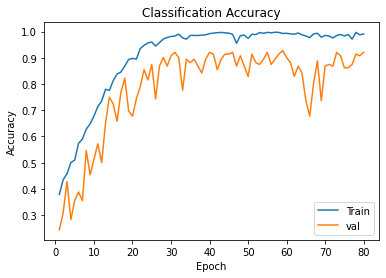

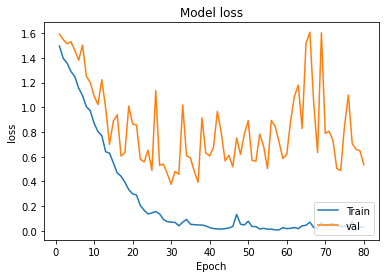

In [ ]:
print("Test set loss: ", score[0])
print("Test set accuracy: ", score[1]*100)

epoch_range = range(1, Epoch_no+1)
plt.plot(epoch_range,Model.history['accuracy'])
plt.plot(epoch_range,Model.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','val'], loc = 'lower right')
plt.show()

plt.plot(epoch_range,Model.history['loss'])
plt.plot(epoch_range,Model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','val'], loc = 'lower right')
plt.show()

In [ ]:
print("%s:  %2f%%"%(model.metrics_names[1], score[1]*100))

accuracy:  99.255013%


#Saving The Model

In [ ]:
model.save(f"/content/drive/MyDrive/AiHackathon/trainedModel/model.h5")
model.save_weights("/content/drive/MyDrive/AiHackathon/trainedModel/Weights.h5")

#Predicting Images

In [ ]:
from sre_constants import CATEGORY
model = tf.keras.models.load_model("/content/drive/MyDrive/AiHackathon/trainedModel/model.h5")  #loading the model

filename = input("Enter the path of the image: ")  #taking the image path as user input
def predict(filename, model):
  
  img = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)  #reading the image
  plt.imshow(img)
  plt.show()

  img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
  img =np.array(img).reshape(-1,IMG_SIZE, IMG_SIZE, 1)
  img = np.asarray(img)
  img = img.astype('float32')
  img /= 255.0
  result = model.predict(img)  #using the model to predict the image

  dict_result = {}
  for i in range(5):
    dict_result[result[0][i]] = CATEGORIES[i]
  
  res = result[0]
  res.sort()  #sorting the result
  res = res[::-1]
  prob = res[:5]

  prob_result = []
  cat_result = []

  for i in range(5):
    prob_result.append((prob[i]*100).round(2))
    cat_result.append(dict_result[prob[i]])
  
  for c in range(len(CATEGORIES)):
   print(f"{cat_result[c]}: {prob_result[c]}%") #displaying
  
  # return cat_result, prob_result

predict(filename,model)